<a href="https://colab.research.google.com/github/adhang/learn-tensorflow/blob/main/NLP_IMBD_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP - IMDB Reviews

Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

# Libraires & Variables

In [ ]:
import numpy as np
import json
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type ='post'
padding_type ='post'
oov_tok = "<OOV>"
training_size = 20000
num_epochs = 30

# Download and Setup Data

In [ ]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

data_train, data_test = imdb['train'], imdb['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEIQ1OD/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEIQ1OD/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEIQ1OD/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
training_sentences = list()
testing_sentences = list()
training_labels = list()
testing_labels = list()

for s, l in data_train:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s, l in data_test:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

# Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# num_words = num of vocab that we allow
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

# Sequences, Padding, Truncating

In [ ]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,
                                padding=padding_type, truncating=trunc_type,
                                maxlen=max_length)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,
                               padding=padding_type, truncating=trunc_type,
                               maxlen=max_length)

# Model Development

## Create Model

In [ ]:
model = tf.keras.Sequential([
                             layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             layers.GlobalAveragePooling1D(),
                            #  layers.Flatten(),
                             layers.Dense(32, activation='relu'),
                             layers.Dense(1, activation='sigmoid')
])

- `GlobalAveragePooling1D` is similar with `Flatten`, but it's more preferable to use `GlobalAveragePooling1D`
- Embedding = vector dimension of sentiment (in case of sentiment analysis)
- Embedding size 16 = 16 sentiment vector (worst, not bad, ..., ..., good)

## Compile

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

## Fit

Before fitting, we have to convert our data (list format) into numpy array

In [ ]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
history = model.fit(
    training_padded, training_labels,
    epochs=num_epochs, validation_data=(testing_padded, testing_labels),
    verbose=1
)

Epoch 1/30
782/782 [==============================] - 8s 5ms/step - loss: 0.5083 - accuracy: 0.7625 - val_loss: 0.4037 - val_accuracy: 0.8140
Epoch 2/30
782/782 [==============================] - 4s 5ms/step - loss: 0.3155 - accuracy: 0.8666 - val_loss: 0.3979 - val_accuracy: 0.8219
Epoch 3/30
782/782 [==============================] - 4s 5ms/step - loss: 0.2620 - accuracy: 0.8945 - val_loss: 0.4227 - val_accuracy: 0.8160
Epoch 4/30
782/782 [==============================] - 4s 5ms/step - loss: 0.2280 - accuracy: 0.9098 - val_loss: 0.4584 - val_accuracy: 0.8119
Epoch 5/30
782/782 [==============================] - 4s 5ms/step - loss: 0.2027 - accuracy: 0.9217 - val_loss: 0.5162 - val_accuracy: 0.7969
Epoch 6/30
782/782 [==============================] - 4s 5ms/step - loss: 0.1825 - accuracy: 0.9297 - val_loss: 0.5680 - val_accuracy: 0.7929
Epoch 7/30
782/782 [==============================] - 4s 6ms/step - loss: 0.1661 - accuracy: 0.9386 - val_loss: 0.5963 - val_accuracy: 0.7918
Epoch 

## History

It's clearly overfitting, but I will keep it as it is (at least for now)

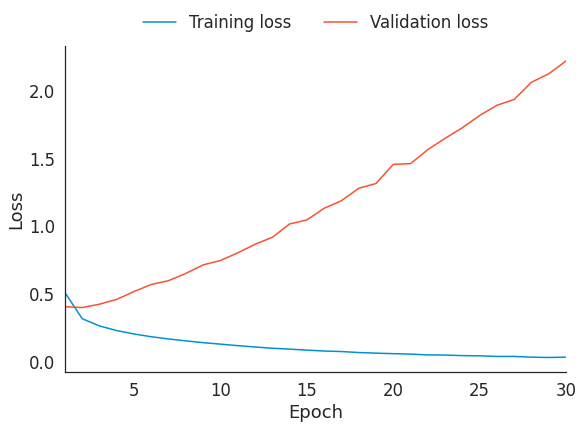

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1,len(history.history['loss'])+1)

sns.lineplot(x=epochs, y=history.history['loss'], 
             label='Training loss', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_loss'], 
             label='Validation loss', ax=ax)

ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_xlim(1, len(epochs))
ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

sns.despine()
plt.show()

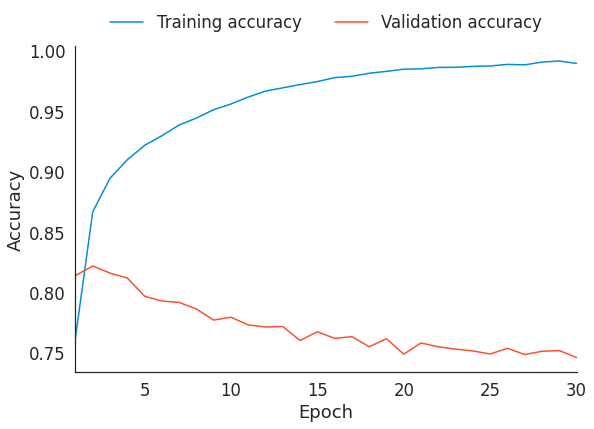

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1,len(history.history['accuracy'])+1)

sns.lineplot(x=epochs, y=history.history['accuracy'], 
             label='Training accuracy', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_accuracy'], 
             label='Validation accuracy', ax=ax)

ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_xlim(1, len(epochs))
ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

sns.despine()
plt.show()

## Predict Sequences

In [ ]:
sen = ['hello']
seq = tokenizer.texts_to_sequences(sen)
pad = pad_sequences(seq, padding = padding_type, truncating = trunc_type, maxlen = max_length)
print(model.predict(pad))

[[0.44745466]]


# Download the Embeddings

## Download

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Try Projecting the Embeddings

[Try Projecting Here](https://projector.tensorflow.org/)